## Challenge: Boston marathon
You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import timeit
from datetime import datetime 
sns.set_style('white')
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

from sklearn import metrics
from sklearn.metrics import silhouette_score
import itertools
from itertools import cycle
from sklearn.metrics import pairwise_distances


In [3]:
#importing the crime dataset
df = pd.read_csv(r"C:\Users\genta\Desktop\Thinkful\UnsupervisedLearning\resultsboston2014.csv")

In [4]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [6]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [7]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [8]:
# Remove hyphens from missing entries
df = df.replace(to_replace='-', value='')

In [9]:
to_number= (['10k','25k','35k','30k','5k','half','20k','40k'])
for column in to_number:
    df[column] = pd.to_numeric(df[column])

In [10]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

ctz          30740
state         2576
25k            216
half            72
5k              52
20k             51
10k             50
30k             40
40k             39
35k             34
city             1
overall          0
pace             0
genderdiv        0
bib              0
official         0
age              0
gender           0
country          0
division         0
name             0
dtype: int64

In [11]:
df.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

In [12]:
# Drop more columns
df = df.drop(['name', 'ctz','bib', 'state', 'country', 'city', 'genderdiv', 'gender', 'overall', 'division'], 1)

In [13]:
df.dtypes

10k         float64
25k         float64
age           int64
official    float64
35k         float64
pace        float64
30k         float64
5k          float64
half        float64
20k         float64
40k         float64
dtype: object

In [14]:
#drop nulls
df=df.dropna()

In [15]:
df = df.sample(frac=0.3, random_state = 0)

In [16]:
df[['10k','25k','age','official','35k','pace','30k','5k','half','20k','40k']] = df[['5k','10k','20k','half','25k','30k','35k','40k','age','official','pace']]

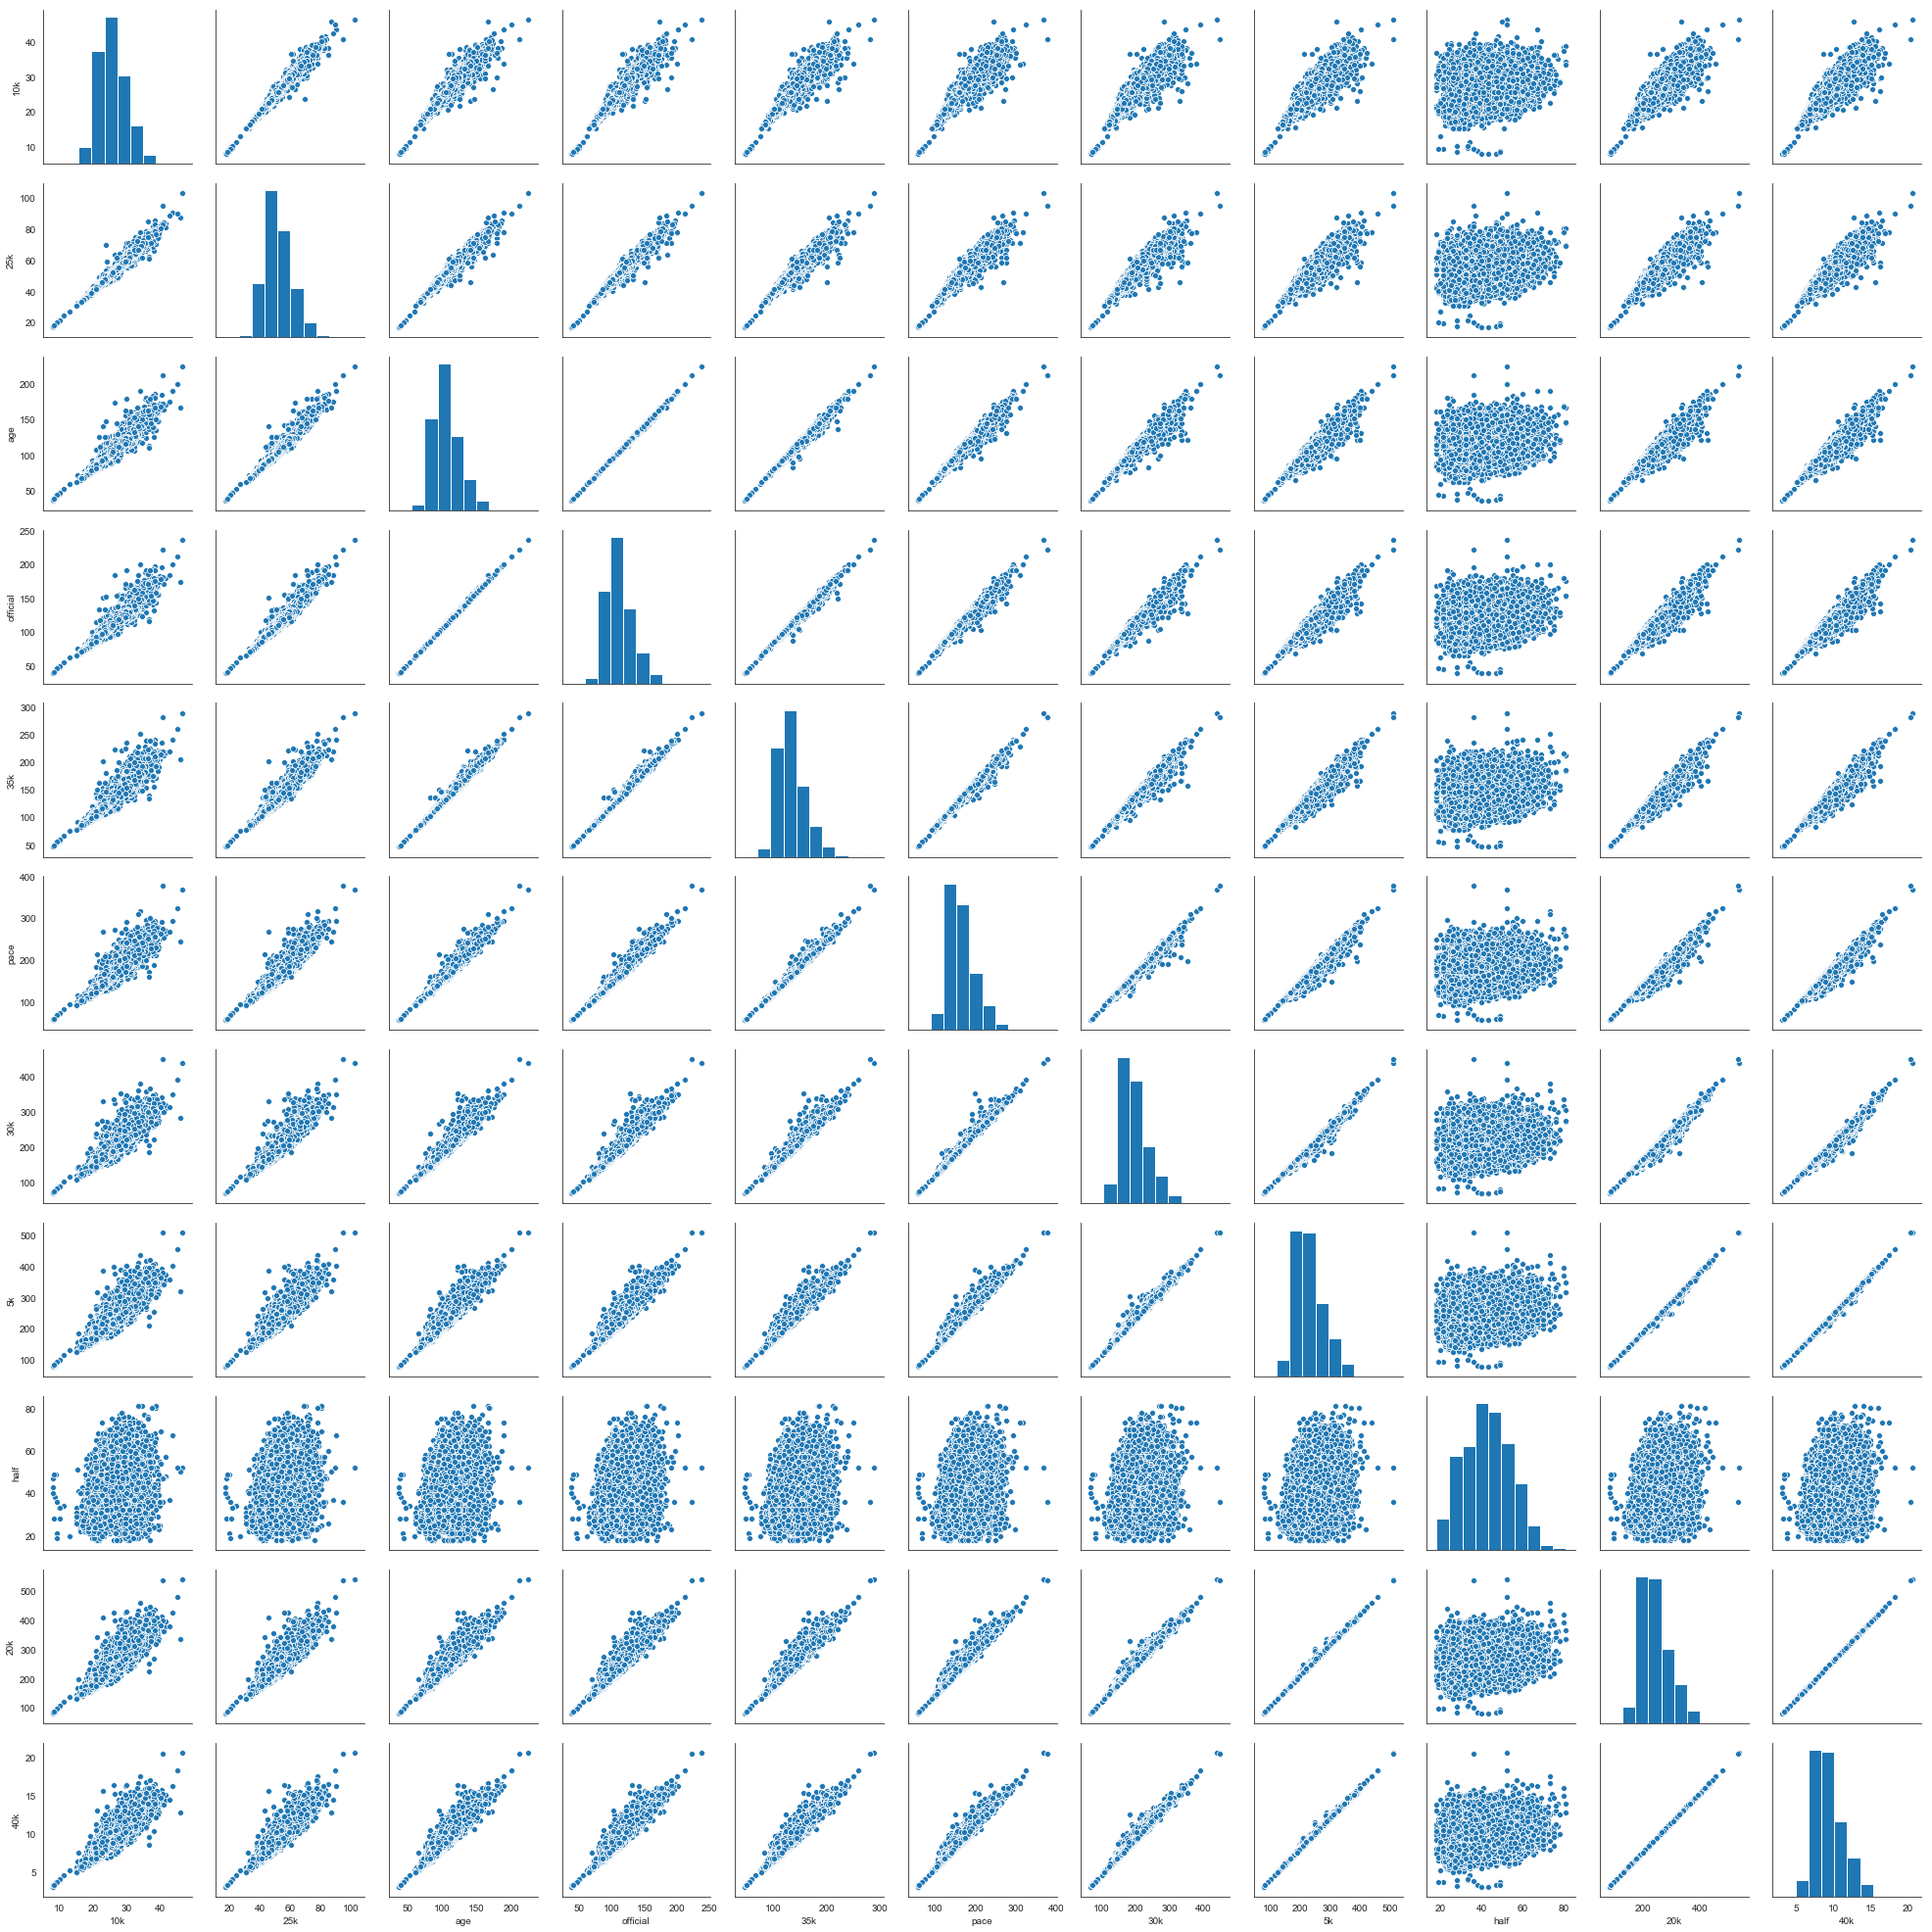

In [17]:
sns.pairplot(data=df)

In [18]:

X = df

#scale
scaler = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaler, columns=list(df))

In [19]:
#PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca


array([[-2.45917282, -0.1733894 ],
       [-0.76482709,  0.69892165],
       [-2.69668009, -1.13257595],
       ...,
       [-6.06958734, -0.39941494],
       [-2.43065467, -0.17459672],
       [ 1.59028271,  0.56202875]])

## Mean-Shift

### All Features w/ Estimated Clusters

8.93 ns ± 0.396 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
bandwidth: 2.068977610420371
Number of Estimated Clusters: 3
Score: 0.5393327242628815


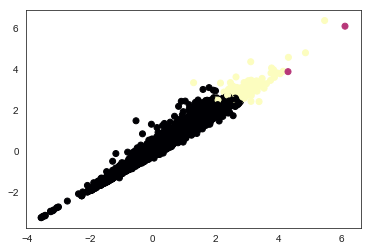

In [20]:
%timeit pass
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_scaled)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))


print("bandwidth: {}".format(bandwidth))
print("Number of Estimated Clusters: {}".format(n_clusters_))
print("Score:", metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

plt.scatter(X_scaled['age'], X_scaled['pace'], c=labels, cmap='magma')
plt.show()


### 2 Principal Components w/ Estimated Clusters

8.62 ns ± 0.459 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
bandwidth: 1.946749412391154
Number of Estimated Clusters: 4
Score: 0.31496330727964517


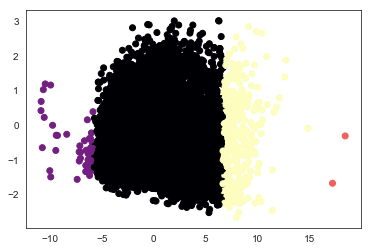

In [21]:
%timeit pass

bandwidth2 = estimate_bandwidth(X_pca, quantile=0.2)
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True).fit(X_pca)

ms2_labels = ms2.labels_
cluster_centers2 = ms2.cluster_centers_
n_clusters_2 = len(np.unique(ms2_labels))

print("bandwidth: {}".format(bandwidth2))
print("Number of Estimated Clusters: {}".format(n_clusters_2))
print("Score:", metrics.silhouette_score(X_pca, ms2_labels, metric='euclidean'))

plt.scatter(X_pca[:,0], X_pca[:,1], c=ms2_labels, cmap='magma')
plt.show()

## K-Means

### All Features w/ Estimated Clusters from Mean-Shift (3)

9.28 ns ± 0.412 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Score: 0.4113434326548242


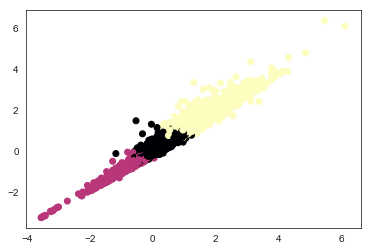

In [22]:
%timeit pass

km = KMeans(n_clusters=3, random_state=0).fit(X_scaled)

km_labels = km.labels_

print("Score:", metrics.silhouette_score(X_scaled, km_labels, metric='euclidean'))
plt.scatter(X_scaled['age'], X_scaled['pace'], c=km_labels, cmap='magma')
plt.show()


### 2 Principal Components w/ Estimated Clusters from Mean-Shift (4)

9.91 ns ± 0.301 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Score: 0.3821419725585381


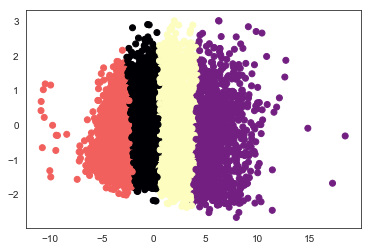

In [23]:
%timeit pass

km2 = KMeans(n_clusters=4, random_state=0).fit(X_pca)

km2_labels = km2.labels_

print("Score:", metrics.silhouette_score(X_pca, km2_labels, metric='euclidean'))
plt.scatter(X_pca[:,0], X_pca[:,1], c=km2_labels, cmap='magma')
plt.show()

## Spectral Clustering

### All Features  w/ Estimated Clusters from Mean-Shift (3)

8.66 ns ± 0.228 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Score: 0.5742685183427001


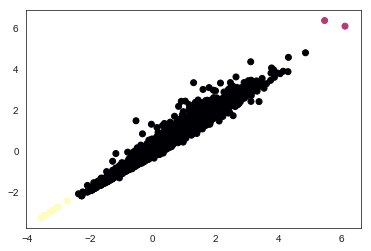

In [24]:
%timeit pass

n_clusters=3

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_scaled)

sc_labels = sc.labels_

print("Score:", metrics.silhouette_score(X_scaled, sc_labels, metric='euclidean'))
plt.scatter(X_scaled['age'], X_scaled['pace'], c=sc_labels, cmap='magma')
plt.show()

### 2 Principal Components w/ Estimated Clusters from Mean-Shift (4)

9.04 ns ± 1.66 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Score: 0.5528464933129065


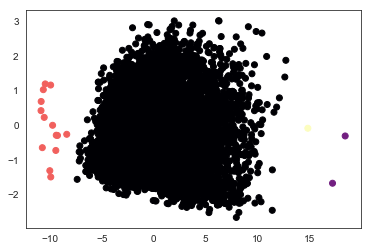

In [25]:
%timeit pass

n_clusters2 = 4

sc2 = SpectralClustering(n_clusters=n_clusters2)
sc2.fit(X_pca)

sc2_labels = sc2.labels_
print("Score:", metrics.silhouette_score(X_pca, sc2_labels, metric='euclidean'))
plt.scatter(X_pca[:,0], X_pca[:,1], c=sc2_labels, cmap='magma')
plt.show()

## Affinity Propagation

### All Features w/ Estimated Clusters

9.01 ns ± 0.223 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Model Fitting Status: Complete.
Estimated Number of Clusters: 136
Score: 0.18946635284421479


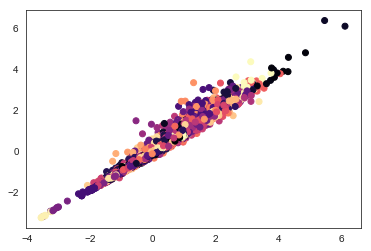

In [26]:
%timeit pass

af = AffinityPropagation().fit(X_scaled)
print('Model Fitting Status: Complete.')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af_labels = af.labels_
print('Estimated Number of Clusters: {}'.format(n_clusters_))
print("Score:", metrics.silhouette_score(X_scaled, af_labels, metric='euclidean'))
plt.scatter(X_scaled['age'], X_scaled['pace'], c=af_labels, cmap='magma')
plt.show()

### 2 Principal Components w/ Estimated Clusters

8.87 ns ± 0.279 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
Model Fitting Status: Complete.
Estimated Number of Clusters: 4366
Score: 0.10025711570725263


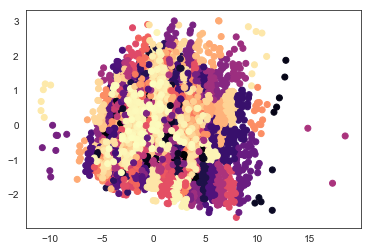

In [27]:
%timeit pass

af2 = AffinityPropagation().fit(X_pca)
print('Model Fitting Status: Complete.')

cluster_centers_indices = af2.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
af2_labels = af2.labels_
print('Estimated Number of Clusters: {}'.format(n_clusters_))

print("Score:", metrics.silhouette_score(X_pca, af2_labels, metric='euclidean'))
plt.scatter(X_pca[:,0], X_pca[:,1], c=af2_labels, cmap='magma')
plt.show()

#### All Scores

In [35]:
print("All Scores:")
print('\n')
print("Mean-Shift Score w/ All Features:", metrics.silhouette_score(X_scaled, labels, metric='euclidean'))
print("Mean-Shift Score w/ 2 Principal Components:", metrics.silhouette_score(X_pca, ms2_labels, metric='euclidean'))
print('\n')
print("K-Means Score w/ All Features w/ Estimated Clusters from Mean-Shift (3):", metrics.silhouette_score(X_scaled, km_labels, metric='euclidean'))
print("K-Means Score w/ 2 Principal Components w/ Estimated Clusters from Mean-Shift (4):", metrics.silhouette_score(X_pca, km2_labels, metric='euclidean'))
print('\n')
print("Spectral Clustering Score w/ All Features w/ Estimated Clusters from Mean-Shift (3):", metrics.silhouette_score(X_scaled, sc_labels, metric='euclidean'))
print("Spectral Clustering Score w/ 2 Principal Components w/ Estimated Clusters from Mean-Shift (4):", metrics.silhouette_score(X_pca, sc2_labels, metric='euclidean'))
print('\n')
print("Affinity Propagation Score w/ All Features w/ Estimated Clusters:", metrics.silhouette_score(X_scaled, af_labels, metric='euclidean'))
print("Affinity Propagation Score w/ 2 Principal Components w/ Estimated Clusters:", metrics.silhouette_score(X_pca, af2_labels, metric='euclidean'))

All Scores:


Mean-Shift Score w/ All Features: 0.5393327242628815
Mean-Shift Score w/ 2 Principal Components: 0.31496330727964517


K-Means Score w/ All Features w/ Estimated Clusters from Mean-Shift (3): 0.4113434326548242
K-Means Score w/ 2 Principal Components w/ Estimated Clusters from Mean-Shift (4): 0.3821419725585381


Spectral Clustering Score w/ All Features w/ Estimated Clusters from Mean-Shift (3): 0.5742685183427001
Spectral Clustering Score w/ 2 Principal Components w/ Estimated Clusters from Mean-Shift (4): 0.5528464933129065


Affinity Propagation Score w/ All Features w/ Estimated Clusters: 0.18946635284421479
Affinity Propagation Score w/ 2 Principal Components w/ Estimated Clusters: 0.10025711570725263


### Conclusions?

<b>Looking at the results of these six models I notice that they perform better or have better scores with all of the features instead of just the two principal components that I used. Spectral CLustering performed the best with this dataset, yielding me scores of 0.57 and 0.55 respectively.  Affinity Propagation gave the worst scores and this probably had a lot to do with the number of clusters that both models estimated. </b>

#### Genesis Taylor